In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
from sklearn.impute import SimpleImputer
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
import math

In [92]:
# Assuming the file 'airbnb_Chicago.csv' is available in the current directory
# Reading the CSV file
df = pd.read_csv('airbnb_Chicago.csv')

In [93]:
unique_rows = df.groupby(['Airbnb Host ID', 'Airbnb Property ID', 'Scraped Date']).size().reset_index(name='Counts')

# Get the number of unique rows
number_of_unique_rows = unique_rows.shape[0]
print(number_of_unique_rows)

120217


# Feature transformation -> Converting dates into ordinal categories

In [94]:
import pandas as pd
 
# Sample DataFrame creation with 'Scraped Date' column
# Replace this with your actual DataFrame loading method
# df = pd.read_csv('path_to_your_csv_file.csv')
 
# Sample data for demonstration purposes
 
# Convert 'Scraped Date' to datetime
df['Scraped Date'] = pd.to_datetime(df['Scraped Date'], format='%d-%m-%Y')
 
# Define the start date of the first period
start_date = pd.Timestamp('2016-01-01')
 
# Function to calculate the period category
def calculate_period_category(date):
    # Calculate the number of quarters since the start date
    quarters_since_start = ((date.year - start_date.year) * 4) + ((date.month - 1) // 3)
    # Add 1 because we are starting with category 1
    return quarters_since_start + 1
 
# Apply the function to the 'Scraped Date' column to create a new 'Period Category' column
df['Period Category'] = df['Scraped Date'].apply(calculate_period_category)
 
# Display the DataFrame
df[['Scraped Date', 'Period Category']]

,Scraped Date,Period Category
0,2016-08-01,3
1,2016-11-01,4
2,2017-02-04,5
3,2017-05-01,6
4,2017-08-01,7
...,...,...
120212,2020-02-15,17
120213,2020-05-01,18
120214,2019-11-02,16
120215,2020-02-09,17


In [95]:
df.drop('Scraped Date', axis=1, inplace=True)
df.head()

,Airbnb Host ID,Airbnb Property ID,superhost_period_all,scrapes_in_period,prev_scrapes_in_period,Superhost,superhost_change_lose_superhost,superhost_change_gain_superhost,rating_ave_pastYear,numReviews_pastYear,...,tractQuartilePrice_variance,booked_days_period_city,revenue_period_city,booked_days_period_tract,revenue_period_tract,tract_booking_share,tract_revenue_share,time_to_date_mean,prev_time_to_date_mean,Period Category
0,2140,10610,5,26,24,0,0,0,NaN,NaN,...,1.363636,104924,13169324,449,25390,0.004279,0.001928,19.739130,NaN,3
1,2140,10610,6,38,26,0,0,0,NaN,NaN,...,1.472727,68005,7337911,276,22274,0.004059,0.003035,84.833333,19.739130,4
2,2140,10610,7,23,38,0,0,0,NaN,NaN,...,1.472727,134202,17482964,340,19451,0.002533,0.001113,17.903226,84.833333,5
3,2140,10610,8,20,23,0,0,0,NaN,NaN,...,1.125000,132913,18431773,366,28349,0.002754,0.001538,47.000000,17.903226,6
4,2140,10610,9,20,20,0,0,0,NaN,NaN,...,1.472727,118284,15313425,395,27483,0.003339,0.001795,11.800000,47.000000,7



- Period 1: Q1 2016 (January, February, March 2016)
- Period 2: Q2 2016 (April, May, June 2016)
- Period 3: Q3 2016 (July, August, September 2016)
- Period 4: Q4 2016 (October, November, December 2016)
- Period 5: Q1 2017 (January, February, March 2017)
- Period 6: Q2 2017 (April, May, June 2017)
- Period 7: Q3 2017 (July, August, September 2017)
- Period 8: Q4 2017 (October, November, December 2017)
- Period 9: Q1 2018 (January, February, March 2018)
- Period 10: Q2 2018 (April, May, June 2018)
- Period 11: Q3 2018 (July, August, September 2018)
- Period 12: Q4 2018 (October, November, December 2018)
- Period 13: Q1 2019 (January, February, March 2019)
- Period 14: Q2 2019 (April, May, June 2019)
- Period 15: Q3 2019 (July, August, September 2019)
- Period 16: Q4 2019 (October, November, December 2019)
- Period 17: Q1 2020 (January, February, March 2020)
- Period 18: Q2 2020 (April, May, June 2020)

In [96]:
import matplotlib.pyplot as plt

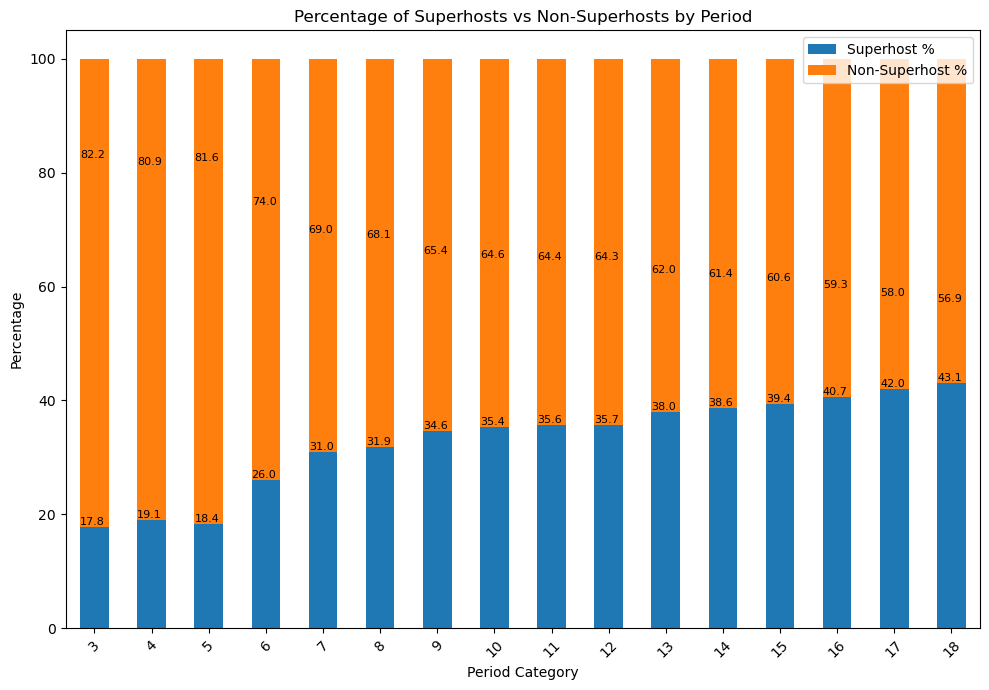

In [97]:
# Assuming 'df' is your DataFrame, with a 'Period Category' column defining each period,
# and a 'Superhost' column with binary values where 1 indicates a superhost and 0 indicates a non-superhost.

# Calculate the percentage of superhosts and non-superhosts for each period
superhost_percentage = df.groupby('Period Category')['Superhost'].mean() * 100
non_superhost_percentage = 100 - superhost_percentage

# Create a DataFrame for the stacked bar chart
stacked_data = pd.DataFrame({
    'Superhost %': superhost_percentage,
    'Non-Superhost %': non_superhost_percentage
})

# Create the stacked bar chart
ax = stacked_data.plot(kind='bar', stacked=True, figsize=(10, 7), color=['#1f77b4', '#ff7f0e'])

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Period Category')
ax.set_title('Percentage of Superhosts vs Non-Superhosts by Period')

# Annotate the percentage on each bar
for i in ax.patches:
    # Get X and Y coordinates of the bar
    x, y = i.get_x(), i.get_height()
    ax.text(x, y, str(round(i.get_height(), 1)), fontsize=8, verticalalignment='bottom')

# Display the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout
plt.show()


# CLEANING

# Imputing missing values

In [98]:
# Assuming 'df' is your DataFrame
df = df.drop(['Created Date',], axis=1) #,'Airbnb Host ID','Airbnb Property ID'
# Convert 'Zipcode' column to object type
df['Zipcode'] = df['Zipcode'].astype(object)

# Columns to be removed
columns_to_remove = ['zip_hispanic_or_latino_anyrace', 'zip_white_nothispanic', 'zip_black_nothispanic', 'zip_asian_nothispanic']

# Remove the specified columns
df.drop(columns=columns_to_remove, axis=1, inplace=True)

# Display the DataFrame's information to verify the changes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120217 entries, 0 to 120216
Data columns (total 90 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Airbnb Host ID                                    120217 non-null  int64  
 1   Airbnb Property ID                                120217 non-null  int64  
 2   superhost_period_all                              120217 non-null  int64  
 3   scrapes_in_period                                 120217 non-null  int64  
 4   prev_scrapes_in_period                            120217 non-null  int64  
 5   Superhost                                         120217 non-null  int64  
 6   superhost_change_lose_superhost                   120217 non-null  int64  
 7   superhost_change_gain_superhost                   120217 non-null  int64  
 8   rating_ave_pastYear                               100372 non-null  float64
 9   numR

In [99]:
df.head()

,Airbnb Host ID,Airbnb Property ID,superhost_period_all,scrapes_in_period,prev_scrapes_in_period,Superhost,superhost_change_lose_superhost,superhost_change_gain_superhost,rating_ave_pastYear,numReviews_pastYear,...,tractQuartilePrice_variance,booked_days_period_city,revenue_period_city,booked_days_period_tract,revenue_period_tract,tract_booking_share,tract_revenue_share,time_to_date_mean,prev_time_to_date_mean,Period Category
0,2140,10610,5,26,24,0,0,0,NaN,NaN,...,1.363636,104924,13169324,449,25390,0.004279,0.001928,19.739130,NaN,3
1,2140,10610,6,38,26,0,0,0,NaN,NaN,...,1.472727,68005,7337911,276,22274,0.004059,0.003035,84.833333,19.739130,4
2,2140,10610,7,23,38,0,0,0,NaN,NaN,...,1.472727,134202,17482964,340,19451,0.002533,0.001113,17.903226,84.833333,5
3,2140,10610,8,20,23,0,0,0,NaN,NaN,...,1.125000,132913,18431773,366,28349,0.002754,0.001538,47.000000,17.903226,6
4,2140,10610,9,20,20,0,0,0,NaN,NaN,...,1.472727,118284,15313425,395,27483,0.003339,0.001795,11.800000,47.000000,7


In [100]:
df['rating_ave_pastYear'].value_counts()

rating_ave_pastYear
5.000000    20000
4.666667     1894
4.750000     1865
4.500000     1836
4.800000     1745
            ...  
4.037500        1
4.420561        1
4.432692        1
4.022472        1
4.169811        1
Name: count, Length: 4098, dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120217 entries, 0 to 120216
Data columns (total 90 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Airbnb Host ID                                    120217 non-null  int64  
 1   Airbnb Property ID                                120217 non-null  int64  
 2   superhost_period_all                              120217 non-null  int64  
 3   scrapes_in_period                                 120217 non-null  int64  
 4   prev_scrapes_in_period                            120217 non-null  int64  
 5   Superhost                                         120217 non-null  int64  
 6   superhost_change_lose_superhost                   120217 non-null  int64  
 7   superhost_change_gain_superhost                   120217 non-null  int64  
 8   rating_ave_pastYear                               100372 non-null  float64
 9   numR

In [102]:
# Create imputers
mean_imputer = SimpleImputer(strategy='mean')  # for numerical columns
mode_imputer = SimpleImputer(strategy='most_frequent')  # for categorical/binary columns

# Iterate over each column in the DataFrame
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        # Numerical columns: Use mean imputation (or median)
        df[col] = mean_imputer.fit_transform(df[[col]]).ravel()
    elif df[col].dtype == 'object' or df[col].dtype == 'bool':
        # For boolean columns, convert to integers, impute, then convert back
        if df[col].dtype == 'bool':
            df[col] = df[col].astype(int)
            df[col] = mode_imputer.fit_transform(df[[col]]).ravel()
            df[col] = df[col].astype(bool)
        else:
            # Categorical columns: Use mode imputation
            df[col] = mode_imputer.fit_transform(df[[col]]).ravel()


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120217 entries, 0 to 120216
Data columns (total 90 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Airbnb Host ID                                    120217 non-null  float64
 1   Airbnb Property ID                                120217 non-null  float64
 2   superhost_period_all                              120217 non-null  float64
 3   scrapes_in_period                                 120217 non-null  float64
 4   prev_scrapes_in_period                            120217 non-null  float64
 5   Superhost                                         120217 non-null  float64
 6   superhost_change_lose_superhost                   120217 non-null  float64
 7   superhost_change_gain_superhost                   120217 non-null  float64
 8   rating_ave_pastYear                               120217 non-null  float64
 9   numR

## Remove outliers

Finding specific methods to remove outliers for each row can be difficult. Have taken a simpler approach. 

In [104]:
df_backup = df

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120217 entries, 0 to 120216
Data columns (total 90 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Airbnb Host ID                                    120217 non-null  float64
 1   Airbnb Property ID                                120217 non-null  float64
 2   superhost_period_all                              120217 non-null  float64
 3   scrapes_in_period                                 120217 non-null  float64
 4   prev_scrapes_in_period                            120217 non-null  float64
 5   Superhost                                         120217 non-null  float64
 6   superhost_change_lose_superhost                   120217 non-null  float64
 7   superhost_change_gain_superhost                   120217 non-null  float64
 8   rating_ave_pastYear                               120217 non-null  float64
 9   numR

In [106]:
# # Applying outlier removal for all numerical columns, removing anything outside 3 standard deviations
# for col in df.columns:
#     if df[col].dtype == 'float64' or df[col].dtype == 'int64':
#         # Calculate the mean and standard deviation
#         col_mean = df[col].mean()
#         col_std = df[col].std()

#         # Define the upper and lower bounds for outliers
#         lower_bound = col_mean - 4 * col_std
#         upper_bound = col_mean + 4 * col_std

#         # Filter out outliers
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Applying outlier removal for all numerical columns, 
# removing anything outside 3 standard deviations
# and ignoring binary columns

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        # Check if the column is binary (only contains 0 and 1)
        if set(df[col].unique()) != {0, 1}:
            # Calculate the mean and standard deviation
            col_mean = df[col].mean()
            col_std = df[col].std()

            # Define the upper and lower bounds for outliers
            lower_bound = col_mean - 4 * col_std
            upper_bound = col_mean + 4 * col_std

            # Filter out outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69760 entries, 0 to 120127
Data columns (total 90 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Airbnb Host ID                                    69760 non-null  float64
 1   Airbnb Property ID                                69760 non-null  float64
 2   superhost_period_all                              69760 non-null  float64
 3   scrapes_in_period                                 69760 non-null  float64
 4   prev_scrapes_in_period                            69760 non-null  float64
 5   Superhost                                         69760 non-null  float64
 6   superhost_change_lose_superhost                   69760 non-null  float64
 7   superhost_change_gain_superhost                   69760 non-null  float64
 8   rating_ave_pastYear                               69760 non-null  float64
 9   numReviews_pastYear  

This script iterates over each column in your DataFrame and applies the IQR method to columns with numerical data (integers and floats). For boolean and categorical columns, it doesn't perform any outlier removal. You may need to adjust this script depending on the specific characteristics of your data.

The records are halved but the quality of the data is higher. (Can experiment with seeing what happens when we dont remove any at all)

# Categorical variables encoding

In [108]:
# Assuming 'df' is your DataFrame and you want to drop the 'Created Date' column

# Drop the 'Created Date' column


# Display the DataFrame's information to verify the column has been dropped
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 69760 entries, 0 to 120127
Data columns (total 90 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Airbnb Host ID                                    69760 non-null  float64
 1   Airbnb Property ID                                69760 non-null  float64
 2   superhost_period_all                              69760 non-null  float64
 3   scrapes_in_period                                 69760 non-null  float64
 4   prev_scrapes_in_period                            69760 non-null  float64
 5   Superhost                                         69760 non-null  float64
 6   superhost_change_lose_superhost                   69760 non-null  float64
 7   superhost_change_gain_superhost                   69760 non-null  float64
 8   rating_ave_pastYear                               69760 non-null  float64
 9   numReviews_pastYear  

In [109]:
# Assuming 'df' is your DataFrame
# Select only the categorical columns for one-hot encoding
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to these columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the DataFrame's information to verify
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 69760 entries, 0 to 120127
Columns: 270 entries, Airbnb Host ID to Neighborhood_Woodlawn
dtypes: bool(184), float64(86)
memory usage: 58.5 MB


In [119]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69760 entries, 0 to 120127
Columns: 268 entries, superhost_period_all to Neighborhood_Woodlawn
dtypes: bool(184), float64(84)
memory usage: 57.5 MB


# Building a model

In [110]:
df_encoded['Superhost'].value_counts()

Superhost
0.0    43756
1.0    26004
Name: count, dtype: int64

In [111]:
df_encoded.head(30)

,Airbnb Host ID,Airbnb Property ID,superhost_period_all,scrapes_in_period,prev_scrapes_in_period,Superhost,superhost_change_lose_superhost,superhost_change_gain_superhost,rating_ave_pastYear,numReviews_pastYear,...,Neighborhood_South Shore,Neighborhood_Uptown,Neighborhood_Washington Heights,Neighborhood_Washington Park,Neighborhood_West Elsdon,Neighborhood_West Loop/Greektown,Neighborhood_West Ridge,Neighborhood_West Town/Noble Square,Neighborhood_Wicker Park,Neighborhood_Woodlawn
0,2140.0,10610.0,5.0,26.0,24.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
1,2140.0,10610.0,6.0,38.0,26.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
2,2140.0,10610.0,7.0,23.0,38.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
3,2140.0,10610.0,8.0,20.0,23.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
4,2140.0,10610.0,9.0,20.0,20.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
5,2140.0,10610.0,10.0,26.0,20.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
6,2140.0,10610.0,11.0,21.0,26.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
7,2140.0,10610.0,12.0,24.0,21.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
8,2140.0,10610.0,13.0,23.0,24.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False
9,2140.0,10610.0,14.0,18.0,23.0,0.0,0.0,0.0,4.746069,86.195141,...,False,False,False,False,False,False,False,False,False,False


In [112]:
df_encoded.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 69760 entries, 0 to 120127
Data columns (total 270 columns):
 #    Column                                            Dtype  
---   ------                                            -----  
 0    Airbnb Host ID                                    float64
 1    Airbnb Property ID                                float64
 2    superhost_period_all                              float64
 3    scrapes_in_period                                 float64
 4    prev_scrapes_in_period                            float64
 5    Superhost                                         float64
 6    superhost_change_lose_superhost                   float64
 7    superhost_change_gain_superhost                   float64
 8    rating_ave_pastYear                               float64
 9    numReviews_pastYear                               float64
 10   numCancel_pastYear                                float64
 11   num_5_star_Rev_pastYear                           float6

In [113]:
df_encoded = df_encoded.drop(['Airbnb Host ID','Airbnb Property ID'], axis=1)

In [114]:
df.head()

,Airbnb Host ID,Airbnb Property ID,superhost_period_all,scrapes_in_period,prev_scrapes_in_period,Superhost,superhost_change_lose_superhost,superhost_change_gain_superhost,rating_ave_pastYear,numReviews_pastYear,...,tractQuartilePrice_variance,booked_days_period_city,revenue_period_city,booked_days_period_tract,revenue_period_tract,tract_booking_share,tract_revenue_share,time_to_date_mean,prev_time_to_date_mean,Period Category
0,2140.0,10610.0,5.0,26.0,24.0,0.0,0.0,0.0,4.746069,86.195141,...,1.363636,104924.0,13169324.0,449.0,25390.0,0.004279,0.001928,19.739130,35.449269,3.0
1,2140.0,10610.0,6.0,38.0,26.0,0.0,0.0,0.0,4.746069,86.195141,...,1.472727,68005.0,7337911.0,276.0,22274.0,0.004059,0.003035,84.833333,19.739130,4.0
2,2140.0,10610.0,7.0,23.0,38.0,0.0,0.0,0.0,4.746069,86.195141,...,1.472727,134202.0,17482964.0,340.0,19451.0,0.002533,0.001113,17.903226,84.833333,5.0
3,2140.0,10610.0,8.0,20.0,23.0,0.0,0.0,0.0,4.746069,86.195141,...,1.125000,132913.0,18431773.0,366.0,28349.0,0.002754,0.001538,47.000000,17.903226,6.0
4,2140.0,10610.0,9.0,20.0,20.0,0.0,0.0,0.0,4.746069,86.195141,...,1.472727,118284.0,15313425.0,395.0,27483.0,0.003339,0.001795,11.800000,47.000000,7.0


# Using gradboost for superhost classification

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame with encoded values
df = df_encoded

# Define your feature columns and the target variable
selected_features = df.columns.tolist()
selected_features.remove('Superhost')
target = 'Superhost'

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df[target], test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# # Generate and plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

# Extracting feature importances
feature_importances = model.feature_importances_
features = selected_features

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# calculating and displaying accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {}". format(accuracy))

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
# calculting and displaying the precision and recall
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]

precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Display the most important features
# print(importance_df.head())  # Modify this line if you want to see more or fewer features


Accuracy: 0.9752006880733946
Precision: 0.9703446947814366
Recall: 0.9632957369527815


In [65]:
import os
importance_df.to_csv(os.path.join(os.getcwd(), 'importance-GB.csv'))

In [120]:
df_backup = df_encoded

In [121]:
# Convert 'Superhost' to integer type
df_encoded['Superhost'] = df_encoded['Superhost'].astype(int)

# Finding elbow using gradient boosting importance

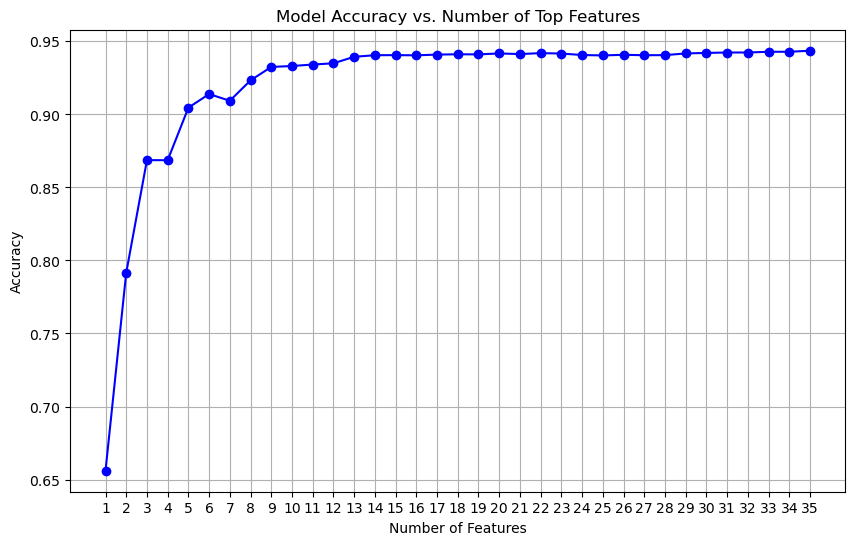

In [122]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming df_encoded and importance_df are already defined and available

# Apply log transformation to non-negative numerical features
for col in df_encoded.columns:
    if df_encoded[col].min() >= 0 and df_encoded[col].dtype in ['float64', 'int64']:
        df_encoded[col] = np.log1p(df_encoded[col])

# Define the target variable
target = 'Superhost'

# Initialize a list to store accuracies for different feature counts
accuracies = []

# Loop over different numbers of top features
for n_features in range(1, 36):  # start from 1 to avoid empty feature set
    # Select top N important features
    important_features = list(importance_df['Feature'][:n_features])
    
    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(df_encoded[important_features], df_encoded[target], test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and fit the Logistic Regression model
    model = LogisticRegression(max_iter=1000, random_state=42,solver='lbfgs')
    model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate and store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 36), accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Accuracy vs. Number of Top Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.xticks(range(1, 36))
plt.grid(True)
plt.show()


In [123]:
features = list(importance_df['Feature'][:15])
for feature in features:
    print(feature)

rating_ave_pastYear
numCancel_pastYear
num_5_star_Rev_pastYear
numReviews_pastYear
superhost_change_gain_superhost
prop_5_StarReviews_pastYear
prev_rating_ave_pastYear
superhost_change_lose_superhost
tract_superhosts_ratio
prev_prop_5_StarReviews_pastYear
prev_num_5_star_Rev_pastYear
hostResponseAverage_pastYear
prev_numCancel_pastYear
prev_numReviews_pastYear
Number of Reviews


# Removing highly colinear

In [124]:
# Define the list of specific columns for which to generate the correlation matrix
columns = list(importance_df['Feature'][importance_df.Importance > 0.005])
# columns = list(importance_df['Feature'][:26])
# Check if the specified columns exist in the DataFrame
missing_columns = [col for col in columns if col not in df.columns]
if missing_columns:
    print(f"The following columns are missing in the DataFrame: {missing_columns}")
else:
    # Filter the DataFrame to include only the specified columns
    filtered_df = df[columns]

    # Generate the correlation matrix for these variables
    correlation_matrix = filtered_df.corr()
#     print(correlation_matrix)
    
    
threshold = 0.5
# Create a dictionary to store the importance of each variable
importance_dict = importance_df.set_index('Feature')['Importance'].to_dict()

# Function to get the more important variable from a pair
def get_more_important(var1, var2):
    return var1 if importance_dict.get(var1, 0) > importance_dict.get(var2, 0) else var2

# Set to store variables to keep (choosing the more important variable from each highly correlated pair)
variables_to_keep = set(correlation_matrix.columns)  # Initially include all variables

# Iterate over the correlation matrix and compare pairs of highly correlated variables
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            # Find the more important variable from the pair
            more_important_var = get_more_important(correlation_matrix.columns[i], correlation_matrix.columns[j])
            # Remove the less important variable
            less_important_var = correlation_matrix.columns[i] if more_important_var == correlation_matrix.columns[j] else corr_matrix.columns[j]
            variables_to_keep.discard(less_important_var)
            
variables_to_keep = list(variables_to_keep)

# Print the list of variables to keep
print("Variables to keep after considering multicollinearity and importance:")
print(variables_to_keep)

Variables to keep after considering multicollinearity and importance:
['num_5_star_Rev_pastYear', 'hostResponseAverage_pastYear', 'superhost_change_lose_superhost', 'tract_superhosts_ratio', 'superhost_change_gain_superhost', 'numCancel_pastYear', 'rating_ave_pastYear']


# Polynomial regression with Interaction terms

In [125]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming df_encoded is your DataFrame with encoded values
df = df_encoded.copy()

# Apply log transformation to non-negative numerical features
for col in df.columns:
    if df[col].min() >= 0 and df[col].dtype in ['float64', 'int64']:
        df[col] = np.log1p(df[col])

# Define your feature columns and the target variable
selected_features = df.columns.tolist()
selected_features.remove('Superhost')
target = 'Superhost'

# List of top features (replace this with your list of top features)
top_features = variables_to_keep
# top_features.remove('superhost_change_lose_superhost')
# top_features.remove('superhost_change_gain_superhost')

# Splitting the dataset into training and testing sets
X = df[top_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset the index of the training and testing sets to ensure alignment
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_interaction = poly.fit_transform(X_train_scaled)
X_test_interaction = poly.transform(X_test_scaled)

# Combine scaled features and interaction terms
X_train_combined = np.concatenate([X_train_scaled, X_train_interaction], axis=1)
X_test_combined = np.concatenate([X_test_scaled, X_test_interaction], axis=1)

# Get feature names for interaction terms and combine with original feature names
interaction_feature_names = poly.get_feature_names_out(X_train.columns)
combined_feature_names = np.concatenate([X_train.columns, interaction_feature_names])

# Convert combined features into DataFrames with feature names
X_train_combined_df = pd.DataFrame(X_train_combined, columns=combined_feature_names)
X_test_combined_df = pd.DataFrame(X_test_combined, columns=combined_feature_names)

# Add the constant term to the features DataFrames
X_train_sm = sm.add_constant(X_train_combined_df)
X_test_sm = sm.add_constant(X_test_combined_df)

# Initialize and fit the logistic regression model using Statsmodels
model_sm = sm.Logit(y_train, X_train_sm).fit_regularized(method='l1')
print(model_sm.summary())

# Predict on the test set
y_pred_prob = model_sm.predict(X_test_sm)
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Calculating and displaying the precision and recall
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.13827889967985887
            Iterations: 178
            Function evaluations: 179
            Gradient evaluations: 178
                           Logit Regression Results                           
Dep. Variable:              Superhost   No. Observations:                55808
Model:                          Logit   Df Residuals:                    55772
Method:                           MLE   Df Model:                           35
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.7905
Time:                        15:05:39   Log-Likelihood:                -7717.1
converged:                       True   LL-Null:                       -36840.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------

# Interpreting the coefficients of Poly reg with interaction terms

In [126]:
coefficients = model_sm.params
p_values = model_sm.pvalues
# Iterate through variable names, coefficients, and p-values
for variable, coef, p_val in zip(coefficients.index, coefficients, p_values):
    if(p_val < 0.05):
        if(coef > 0):
            new_coeff = round((math.exp(coef*0.01) -1) * 100 , 3)
            print("1 % increase in {} results in a {} % increase the chances of being a superhost".format(variable, new_coeff))
        else:
            new_coeff = round((math.exp(coef*0.01) -1) * 100 , 3)
            print("1 % increase in {} results in a {} % decrease the chances of being a superhost".format(variable, abs(new_coeff)))
            

1 % increase in num_5_star_Rev_pastYear hostResponseAverage_pastYear results in a 0.229 % increase the chances of being a superhost
1 % increase in num_5_star_Rev_pastYear tract_superhosts_ratio results in a 0.121 % increase the chances of being a superhost
1 % increase in num_5_star_Rev_pastYear rating_ave_pastYear results in a 2.297 % increase the chances of being a superhost
1 % increase in numCancel_pastYear rating_ave_pastYear results in a 0.482 % decrease the chances of being a superhost


# Logistic Regression

In [127]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming df_encoded is your DataFrame with encoded values and importance_df is defined
df = df_encoded.copy()

# Apply log transformation to non-negative numerical features
for col in df.columns:
    if df[col].min() >= 0 and df[col].dtype in ['float64', 'int64']:
        df[col] = np.log1p(df[col])

# Define your feature columns and the target variable
selected_features = df.columns.tolist()
selected_features.remove('Superhost')
target = 'Superhost'

# List of top features from importance_df
# top_features = importance_df['Feature'][:26].tolist()

top_features = variables_to_keep
top_features.remove('superhost_change_lose_superhost')
top_features.remove('superhost_change_gain_superhost')

# Splitting the dataset into training and testing sets
X = df[top_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Reset the index of the training and testing sets to ensure alignment
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Scale the features and add back the feature names
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled features into a DataFrame with feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Add the constant term to the features DataFrames
X_train_sm = sm.add_constant(X_train_scaled_df)
X_test_sm = sm.add_constant(X_test_scaled_df)


# Initialize and fit the logistic regression model using Statsmodels
model_sm = sm.Logit(y_train, X_train_sm).fit_regularized(method='l1')
print(model_sm.summary())

# Predict on the test set
y_pred_prob = model_sm.predict(X_test_sm)
y_pred_class = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Calculating and displaying the precision and recall
TP = cm[1, 1]
FP = cm[0, 1]
FN = cm[1, 0]
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print(f"Precision: {precision}")
print(f"Recall: {recall}")


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2534618667446085
            Iterations: 38
            Function evaluations: 38
            Gradient evaluations: 38
                           Logit Regression Results                           
Dep. Variable:              Superhost   No. Observations:                55808
Model:                          Logit   Df Residuals:                    55802
Method:                           MLE   Df Model:                            5
Date:                Fri, 08 Dec 2023   Pseudo R-squ.:                  0.6160
Time:                        15:06:09   Log-Likelihood:                -14145.
converged:                       True   LL-Null:                       -36840.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

# Interpreting the coefficients of Logistic regression

In [128]:
coefficients = model_sm.params
p_values = model_sm.pvalues
# Iterate through variable names, coefficients, and p-values
for variable, coef, p_val in zip(coefficients.index, coefficients, p_values):
    if(p_val < 0.05):
        if(coef > 0):
            new_coeff = round((math.exp(coef*0.01) -1) * 100 , 3)
            print("1 % increase in {} results in a {} % increase the chances of being a superhost".format(variable, new_coeff))
        else:
            new_coeff = round((math.exp(coef*0.01) -1) * 100 , 3)
            print("1 % increase in {} results in a {} % decrease the chances of being a superhost".format(variable, abs(new_coeff)))
            

1 % increase in const results in a 2.273 % decrease the chances of being a superhost
1 % increase in num_5_star_Rev_pastYear results in a 2.332 % increase the chances of being a superhost
1 % increase in hostResponseAverage_pastYear results in a 0.452 % increase the chances of being a superhost
1 % increase in tract_superhosts_ratio results in a 0.935 % increase the chances of being a superhost
1 % increase in numCancel_pastYear results in a 2.348 % decrease the chances of being a superhost
1 % increase in rating_ave_pastYear results in a 3.028 % increase the chances of being a superhost


(i) hosted at least 10 trips
(ii) maintained a 90% 	 rate when responding to guests requests; 
(iii) completed all confirmed reservations without cancellation;  
(iv) received a 5-star review at least 80% of the time.

In [ ]:
import os
correlation_matrix.to_csv(os.path.join(os.getcwd(), 'corr-matrix-15-vars.csv'))

# statmodels with K fold

In [129]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import statsmodels.api as sm
import numpy as np
 
# Assuming df_encoded is your DataFrame with encoded values
df = df_encoded.copy()
 
# Apply log transformation or any other appropriate transformation
for col in df.columns:
    if df[col].min() >= 0 and df[col].dtype in ['float64', 'int64']:
        df[col] = np.log1p(df[col])
 
# Define your feature columns and the target variable
features = importance_df['Feature'][:15]
target = 'Superhost'

X = df[features]
y = df['Superhost']
 
# Define the KFold cross-validator
kf = KFold(n_splits=8, shuffle=True, random_state=42)
 
# Prepare a scaler based on the full dataset
scaler = StandardScaler()
scaler.fit(X) # Fit on the full dataset
 
# Initialize lists to store the results of each fold
fold_accuracies = []
fold_confusion_matrices = []
 
for train_index, val_index in kf.split(X):
    # Split the data into this fold's training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    # Scale the features
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    # Adding a constant to the model
    X_train_sm = sm.add_constant(X_train_scaled)
    X_val_sm = sm.add_constant(X_val_scaled)
    # Initialize and fit the logistic regression model with regularization
    model_sm = sm.Logit(y_train, X_train_sm).fit_regularized(method='l1', alpha=1.0, maxiter=500, trim_mode='size', auto_trim_tol=None, disp=0)  # disp=0 suppresses output
    # Predict on the validation set
    y_val_pred = model_sm.predict(X_val_sm)
    y_val_pred_class = (y_val_pred > 0.5).astype(int)
    # Calculate accuracy on the validation set
    val_accuracy = accuracy_score(y_val, y_val_pred_class)
    fold_accuracies.append(val_accuracy)
    # Calculate the confusion matrix for the validation set
    cm_val = confusion_matrix(y_val, y_val_pred_class)
    fold_confusion_matrices.append(cm_val)
 
# Output the results
print(f"Fold Accuracies: {fold_accuracies}")
print(f"Mean Accuracy: {np.mean(fold_accuracies)}")

C:\Users\pawan\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 2 out of 16 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\pawan\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 4 out of 16 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\pawan\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 3 out of 16 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
C:\Users\pawan\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass 

Fold Accuracies: [0.9635321100917431, 0.9587155963302753, 0.9572247706422018, 0.9576834862385321, 0.9583715596330276, 0.9592889908256881, 0.9591743119266055, 0.9589449541284404]
Mean Accuracy: 0.9591169724770643


C:\Users\pawan\anaconda3\Lib\site-packages\statsmodels\base\l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 3 out of 16 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)


In [ ]:
features 